In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df = pd.read_csv('/content/survey_results_public.csv')
sc_df = pd.read_csv('/content/survey_results_schema.csv')

In [3]:
raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [4]:
sc_df

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [14]:
sc_raw = pd.read_csv('/content/survey_results_schema.csv', index_col= 'Column').QuestionText

In [15]:
sc_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [16]:
sc_raw['CurrencyDesc']

"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."

**Data Preprocessing**
 -  Cleaning data, filling missing value, drop unnecesary data


In [26]:

select_col = [ 
              #Demographics
              'Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor',
              
              #Programming experience
               'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck',

              #Employment
              'Employment', 'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime', 


]

In [27]:
len(select_col)

18

In [30]:
survey_df = raw_df[select_col].copy()
schema = sc_raw[select_col]

In [31]:
survey_df.shape

(64461, 18)

In [32]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Age1stCode              57900 non-null  object 
 6   YearsCode               57684 non-null  object 
 7   YearsCodePro            46349 non-null  object 
 8   LanguageWorkedWith      57378 non-null  object 
 9   LanguageDesireNextYear  54113 non-null  object 
 10  NEWLearn                56156 non-null  object 
 11  NEWStuck                54983 non-null  object 
 12  Employment              63854 non-null  object 
 13  DevType                 49370 non-null  object 
 14  WorkWeekHrs             41151 non-null

In [33]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN
64457,Morocco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN


In [34]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Employment                Which of the following best describes your cur...
DevTy

In [35]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [36]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors = 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors = 'coerce')

In [37]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [39]:
survey_df.drop(survey_df[survey_df.Age <10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age >100].index, inplace = True)

In [41]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs <140].index, inplace = True)

In [42]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [43]:
survey_df['Gender'].value_counts()

Man                                                            11586
Woman                                                           1123
Non-binary, genderqueer, or gender non-conforming                124
Woman;Man                                                         44
Woman;Non-binary, genderqueer, or gender non-conforming           33
Man;Non-binary, genderqueer, or gender non-conforming             33
Woman;Man;Non-binary, genderqueer, or gender non-conforming       14
Name: Gender, dtype: int64

In [44]:
survey_df.where(~(survey_df.Gender.str.contains(';', na = False)), np.nan, inplace = True)

In [45]:
survey_df['Gender'].value_counts()

Man                                                  11586
Woman                                                 1123
Non-binary, genderqueer, or gender non-conforming      124
Name: Gender, dtype: int64

In [48]:
survey_df.head(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,15.0,4.0,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN
5,Germany,NaN,Man,"Secondary school (e.g. American high school, G...",NaN,14.0,6.0,4.0,HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript,Once a year,Play games;Visit Stack Overflow;Watch help / t...,Employed full-time,"Designer;Developer, front-end;Developer, mobile",NaN,Slightly satisfied,Diversity of the company or organization;Langu...,Never
6,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",18.0,6.0,4.0,C#;HTML/CSS;PHP,C#;HTML/CSS;PHP,Every few months,NaN,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Very satisfied,NaN,Sometimes: 1-2 days per month but less than we...
14,France,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",13.0,4.0,NaN,Bash/Shell/PowerShell;C;HTML/CSS;Java;Python;SQL,Assembly;Bash/Shell/PowerShell;C;Go,Once every few years,Play games;Visit Stack Overflow;Panic,Student,NaN,NaN,NaN,"Languages, frameworks, and other technologies ...",NaN
20,Belgium,23.0,Man,"Secondary school (e.g. American high school, G...",NaN,16.0,7.0,NaN,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Bash/Shell/PowerShell;C#;HTML/CSS;Java;Scala;S...,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Student,NaN,NaN,NaN,"Languages, frameworks, and other technologies ...",NaN
26,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",12.0,20.0,20.0,Bash/Shell/PowerShell;C;C++;Java;Python;SQL,Bash/Shell/PowerShell;C;C++;Perl;Python;SQL,Once every few years,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Database administrator;Developer, full-stack;E...",NaN,NaN,NaN,NaN
27,China,NaN,Man,Some college/university study without earning ...,"A health science (such as nursing, pharmacy, r...",22.0,2.0,NaN,Python;R,NaN,Every few months,Visit Stack Overflow;Do other work and come ba...,Student,NaN,NaN,NaN,Diversity of the company or organization;Langu...,NaN
28,Ukraine,18.0,Man,"Secondary school (e.g. American high school, G...",NaN,15.0,NaN,NaN,C#;C++;HTML/CSS;Python,C#;HTML/CSS;Java;JavaScript;Kotlin;Python;SQL;...,Every few months,Meditate;Play games;Call a coworker or friend;...,Student,NaN,NaN,NaN,Specific department or team I’d be working on;...,NaN


## Data analysis and visualization

In [49]:
%matplotlib inline
sns.set_style('white')

## Country

In [54]:
survey_df.Country.nunique()

177

In [55]:
survey_df.Country.value_counts()

India               4359
United States       3344
Germany             1188
United Kingdom       979
Canada               689
                    ... 
Marshall Islands       1
Monaco                 1
Gabon                  1
Bahamas                1
Chad                   1
Name: Country, Length: 177, dtype: int64

In [56]:
top_country = survey_df.Country.value_counts().head(15)
top_country

India                 4359
United States         3344
Germany               1188
United Kingdom         979
Canada                 689
France                 619
Brazil                 551
Pakistan               406
Netherlands            404
Nigeria                398
Poland                 373
Bangladesh             361
Russian Federation     352
Italy                  338
Turkey                 327
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


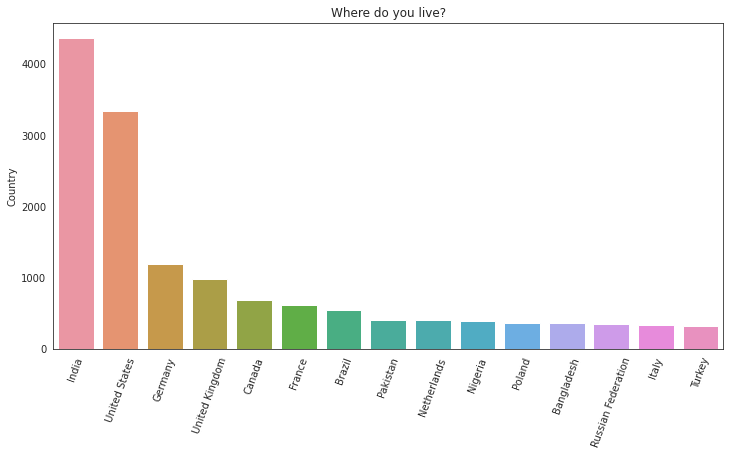

In [58]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 70)
plt.title(schema.Country)
sns.barplot(top_country.index, top_country)

## Age

(array([2323., 5425., 1427.,  627.,  276.,  162.,   55.,   10.]),
 array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <a list of 8 Patch objects>)

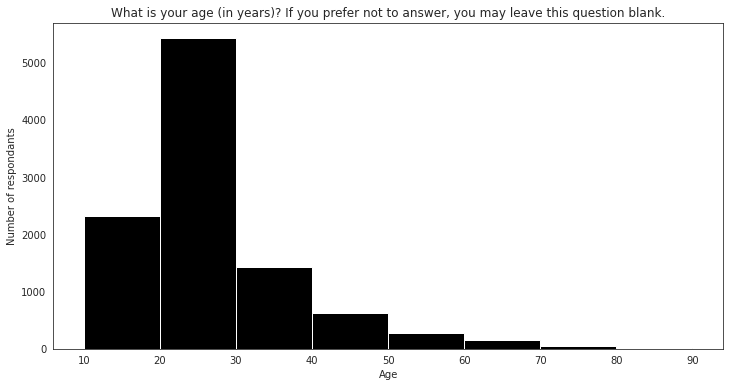

In [61]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondants')
plt.hist (survey_df.Age, bins = np.arange(10,100,10), color = 'black')

## Gender

In [62]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [66]:
gender_count = survey_df.Gender.value_counts()
gender_count

Man                                                  11586
Woman                                                 1123
Non-binary, genderqueer, or gender non-conforming      124
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7f452f291c50>,
 [Text(-1.0491414801981414, 0.3306087635372859, 'Man'),
  Text(1.0386237327926677, -0.3622992432780193, 'Woman'),
  Text(1.0994932219701299, -0.03338644697691887, 'Non-binary, genderqueer, or gender non-conforming')])

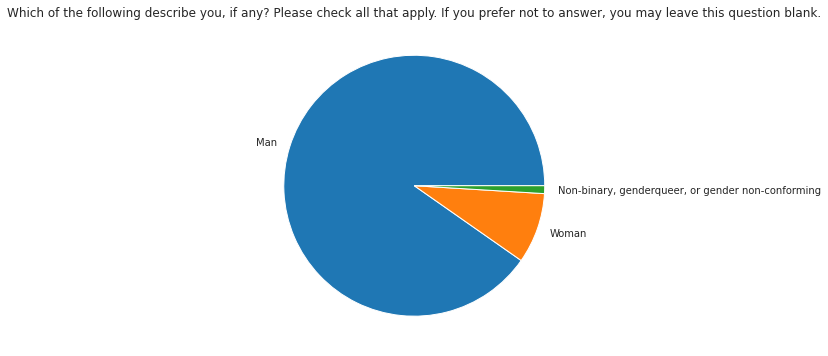

In [67]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_count, labels = gender_count.index )

# Educational Level

In [68]:
survey_df.EdLevel.unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education'], dtype=object)

Text(0, 0.5, '')

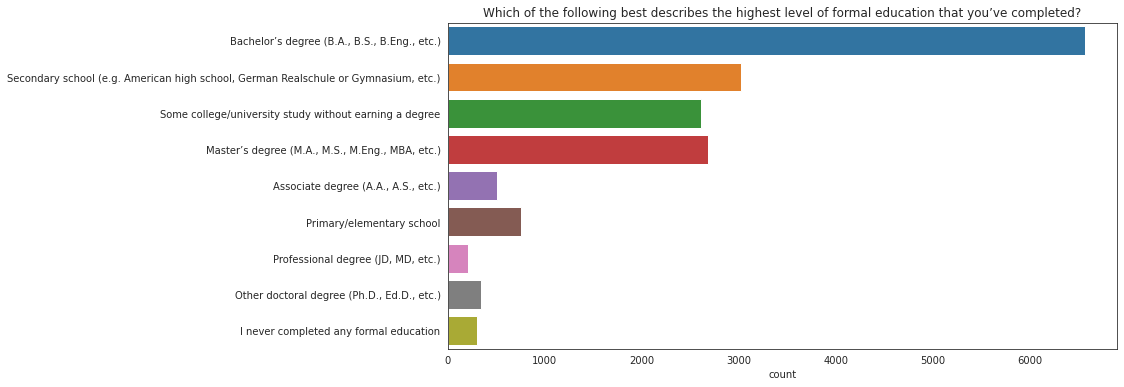

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(y = survey_df.EdLevel)
plt.title(schema.EdLevel)
plt.ylabel(None)

In [73]:
survey_df.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering                   7767
Another engineering discipline (such as civil, electrical, mechanical, etc.)      1241
Information systems, information technology, or system administration             1049
Web development or web design                                                      617
A natural science (such as biology, chemistry, physics, etc.)                      492
Mathematics or statistics                                                          463
A business discipline (such as accounting, finance, marketing, etc.)               381
A social science (such as anthropology, psychology, political science, etc.)       233
A humanities discipline (such as literature, history, philosophy, etc.)            206
I never declared a major                                                           171
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     162
A health science (such as nursing, pharmacy

In [76]:
survey_df.UndergradMajor.value_counts()/ survey_df.UndergradMajor.count()

Computer science, computer engineering, or software engineering                   0.602747
Another engineering discipline (such as civil, electrical, mechanical, etc.)      0.096306
Information systems, information technology, or system administration             0.081406
Web development or web design                                                     0.047881
A natural science (such as biology, chemistry, physics, etc.)                     0.038181
Mathematics or statistics                                                         0.035930
A business discipline (such as accounting, finance, marketing, etc.)              0.029567
A social science (such as anthropology, psychology, political science, etc.)      0.018082
A humanities discipline (such as literature, history, philosophy, etc.)           0.015986
I never declared a major                                                          0.013270
Fine arts or performing arts (such as graphic design, music, studio art, etc.)    0.012572

In [77]:
percantage = survey_df.UndergradMajor.value_counts() *100/ survey_df.UndergradMajor.count()

In [78]:
percantage

Computer science, computer engineering, or software engineering                   60.274717
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.630607
Information systems, information technology, or system administration              8.140618
Web development or web design                                                      4.788142
A natural science (such as biology, chemistry, physics, etc.)                      3.818097
Mathematics or statistics                                                          3.593047
A business discipline (such as accounting, finance, marketing, etc.)               2.956697
A social science (such as anthropology, psychology, political science, etc.)       1.808164
A humanities discipline (such as literature, history, philosophy, etc.)            1.598634
I never declared a major                                                           1.327022
Fine arts or performing arts (such as graphic design, music, studio art, etc.)  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'percentage (%)')

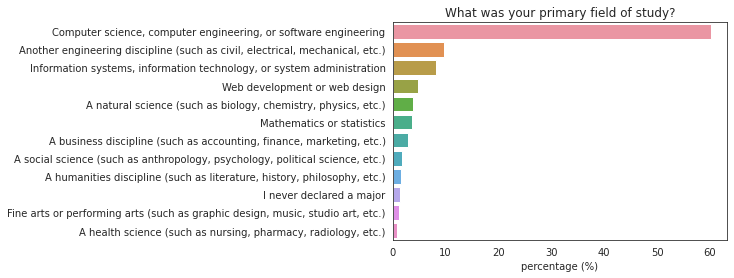

In [81]:
sns.barplot(percantage, percantage.index)
plt.title(schema.UndergradMajor)
plt.ylabel(None)
plt.xlabel('percentage (%)')

# Employmental Status

In [83]:
schema.Employment

'Which of the following best describes your current employment status?'

In [92]:
emp = survey_df.Employment.value_counts()
emp

Employed full-time                                      9563
Student                                                 7734
Not employed, but looking for work                      2324
Independent contractor, freelancer, or self-employed    1715
Employed part-time                                       913
Not employed, and not looking for work                   318
Retired                                                  241
Name: Employment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '')

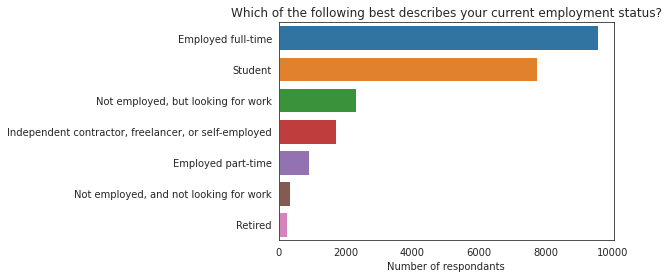

In [96]:
sns.barplot(emp, emp.index)
plt.title(schema.Employment)
plt.xlabel('Number of respondants')
plt.ylabel(None)

In [97]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [98]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                    739
Developer, back-end                                                                                                                                      531
Developer, front-end                                                                                                                                     329
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                           304
Developer, mobile                                                                                                                                        233
                                                                                                                                                        ... 
Designer;Developer, back-end;Developer, game or graphics;D

In [99]:
survey_df.DevType

1                  Developer, full-stack;Developer, mobile
2                                                      NaN
4                                                      NaN
5          Designer;Developer, front-end;Developer, mobile
6        Developer, back-end;Developer, front-end;Devel...
                               ...                        
64456                                  Senior executive/VP
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: DevType, Length: 23457, dtype: object

In [109]:
dev_df = split_multicolumn (survey_df.DevType)

In [110]:
dev_df

,"Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,Database administrator,Engineering manager,Product manager,System administrator,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,"Engineer, data","Developer, desktop or enterprise applications","Developer, embedded applications or devices",Educator,Senior executive/VP,"Developer, game or graphics","Engineer, site reliability",Scientist,Marketing or sales professional
1,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
64457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [111]:
dev_total = dev_df.sum().sort_values(ascending = False)
dev_total

Developer, back-end                              4244
Developer, full-stack                            4111
Developer, front-end                             3167
Developer, desktop or enterprise applications    1838
Developer, mobile                                1815
Designer                                         1322
System administrator                              992
Database administrator                            988
Academic researcher                               902
Data or business analyst                          876
Data scientist or machine learning specialist     855
Developer, embedded applications or devices       844
DevOps specialist                                 686
Engineer, data                                    679
Developer, game or graphics                       666
Educator                                          663
Developer, QA or test                             629
Product manager                                   542
Engineering manager         

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '')

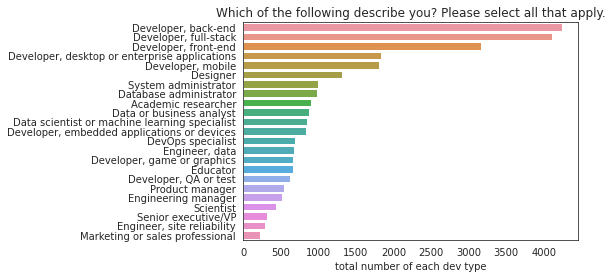

In [112]:
sns.barplot(dev_total, dev_total.index)
plt.title(schema.DevType)
plt.xlabel('total number of each dev type')
plt.ylabel(None)

In [113]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [114]:
survey_df.LanguageWorkedWith

1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
4                                        HTML/CSS;Ruby;SQL
5                                 HTML/CSS;Java;JavaScript
6                                          C#;HTML/CSS;PHP
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 23457, dtype: object

In [115]:
language_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [116]:
language_df

,JavaScript,Swift,Objective-C,Python,HTML/CSS,Ruby,SQL,Java,C#,PHP,Bash/Shell/PowerShell,C,Scala,TypeScript,C++,R,Julia,Assembly,Kotlin,Go,VBA,Rust,Dart,Haskell,Perl
1,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [117]:
language_total = language_df.sum().sort_values(ascending = False)
language_total

HTML/CSS                 11390
JavaScript               11006
Python                    8857
SQL                       8572
Java                      8145
C++                       5933
C                         5708
PHP                       5052
C#                        4943
Bash/Shell/PowerShell     4611
TypeScript                3046
Assembly                  1801
Kotlin                    1290
Go                        1237
R                         1196
VBA                       1082
Rust                      1039
Swift                     1019
Ruby                       982
Dart                       910
Objective-C                612
Haskell                    551
Perl                       472
Scala                      470
Julia                      230
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '')

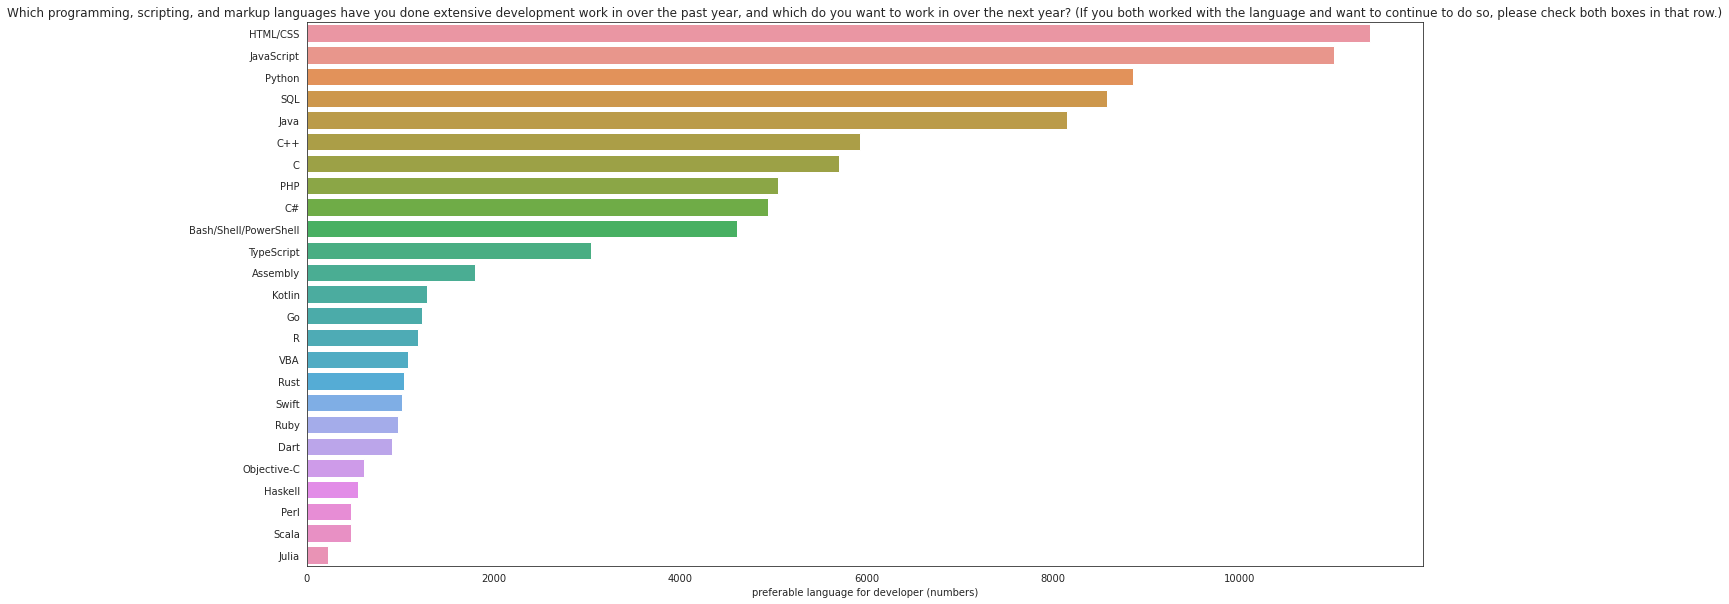

In [120]:
plt.figure(figsize=(20,10))
sns.barplot(language_total, language_total.index)
plt.title(schema.LanguageWorkedWith)
plt.xlabel('preferable language for developer (numbers)')
plt.ylabel(None)

In [121]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [122]:
survey_df.LanguageDesireNextYear

1                                             Python;Swift
2                                 Objective-C;Python;Swift
4                                          Java;Ruby;Scala
5                                 HTML/CSS;Java;JavaScript
6                                          C#;HTML/CSS;PHP
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                             HTML/CSS;Java;JavaScript
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageDesireNextYear, Length: 23457, dtype: object

In [123]:
language_df1 = split_multicolumn(survey_df.LanguageDesireNextYear)
language_df1

,Python,Swift,Objective-C,Java,Ruby,Scala,HTML/CSS,JavaScript,C#,PHP,Assembly,Bash/Shell/PowerShell,C,Go,TypeScript,C++,Perl,SQL,Kotlin,R,VBA,Julia,Haskell,Rust,Dart
1,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [124]:
language_total1 = language_df1.mean().sort_values(ascending = False) * 100
language_total1

Python                   38.359552
JavaScript               33.414333
HTML/CSS                 26.533657
SQL                      23.732788
Java                     20.867971
C++                      17.888050
TypeScript               16.856375
C#                       16.566483
Go                       13.983033
Bash/Shell/PowerShell    12.938568
Kotlin                   12.763781
PHP                      12.073155
Rust                     12.004945
C                        11.399582
Swift                     8.287505
Dart                      7.127936
R                         6.940359
Ruby                      6.177261
Assembly                  5.444004
Haskell                   4.408066
Scala                     3.998806
Julia                     2.749712
Objective-C               2.647397
Perl                      2.084666
VBA                       2.024982
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '')

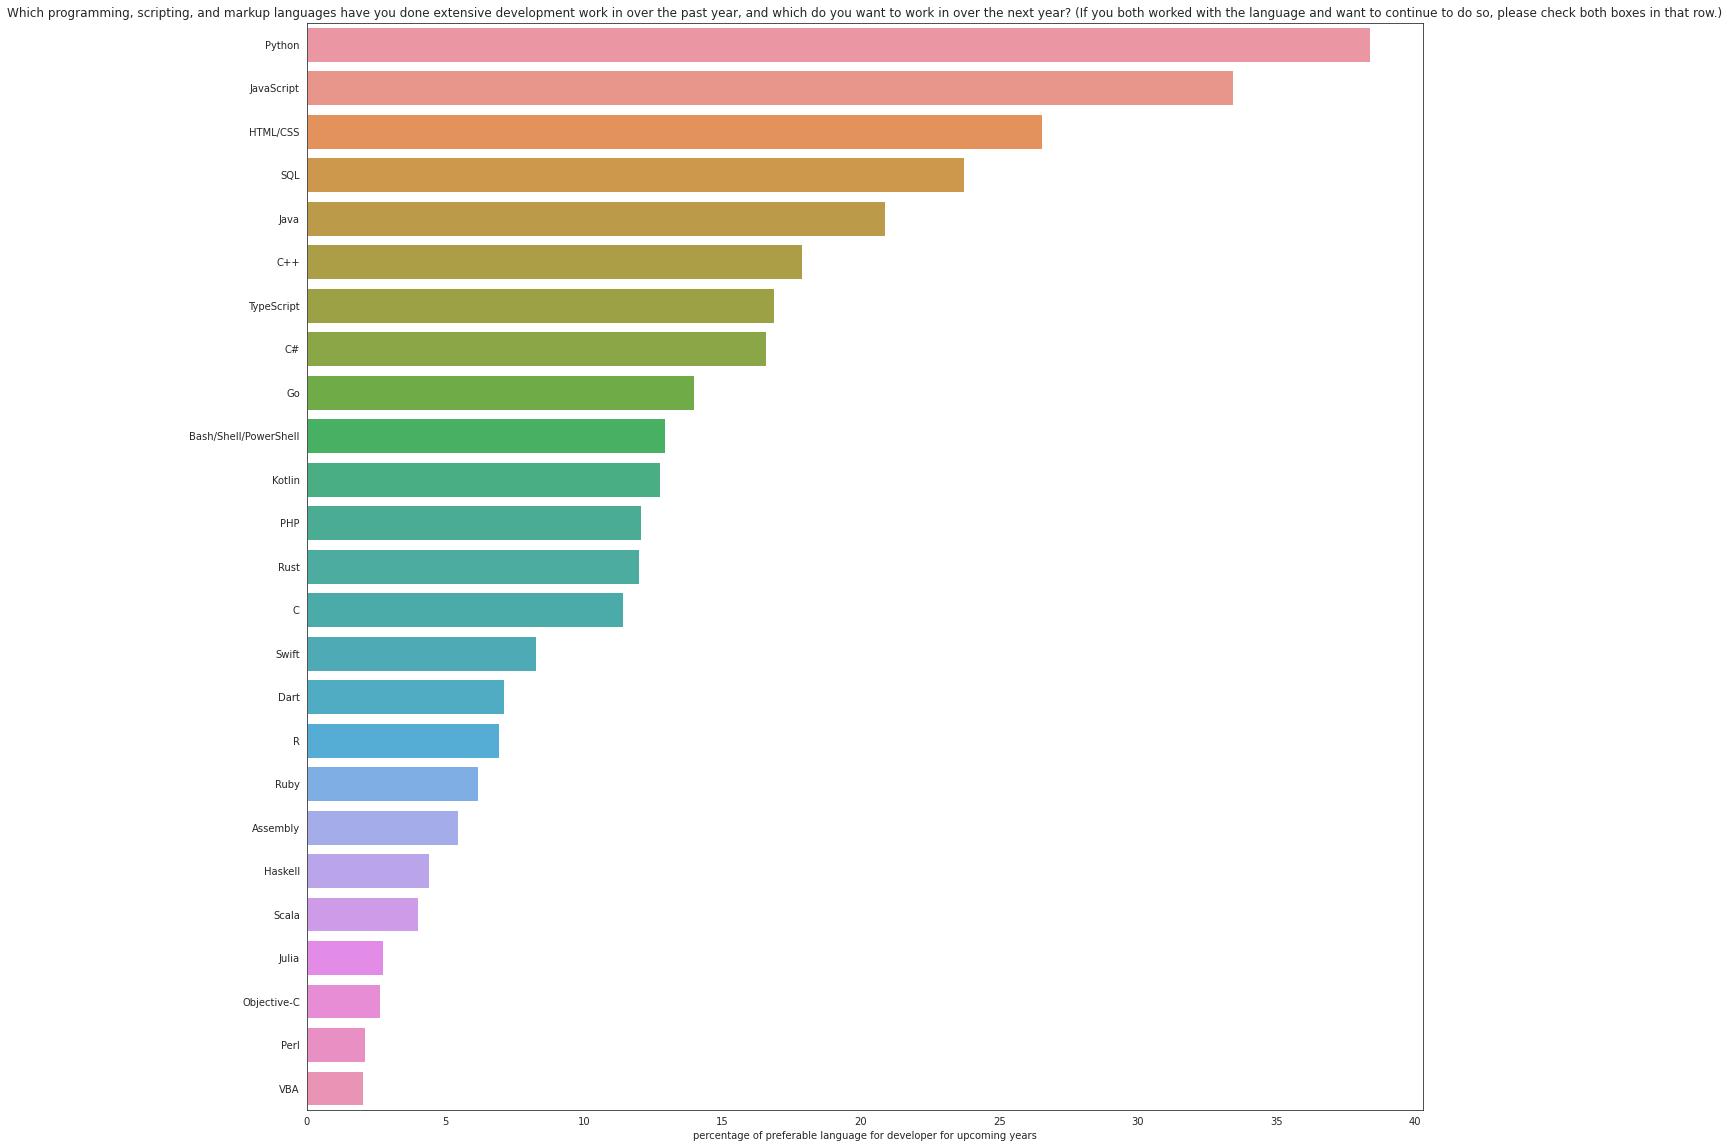

In [126]:
plt.figure(figsize=(20,20))
sns.barplot(language_total1, language_total1.index)
plt.title(schema.LanguageDesireNextYear)
plt.xlabel('percentage of preferable language for developer for upcoming years')
plt.ylabel(None)

In [127]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Years of coding')

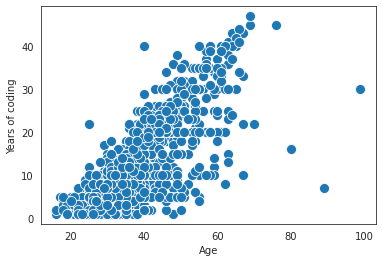

In [132]:
sns.scatterplot('Age', 'YearsCodePro', s=100, data = survey_df)
plt.xlabel('Age')
plt.ylabel('Years of coding')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


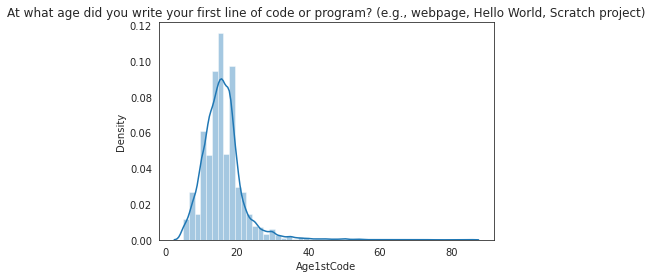

In [133]:
plt.title(schema.Age1stCode)
sns.distplot(survey_df.Age1stCode)